### Codio Activity 22.3: Basic Weight Update

**Expected Time = 60 minutes**

**Total Points = 60**

This activity focuses on updating the weights to improve the performance of the network.  To demonstrate this update process, we implement a basic loss function and its derivative to update randomly initialized weights.  You begin with a very basic dataset meant to replicate the logic gate problems surrounding the early ANN models.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)
- [Problem 6](#-Problem-6)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# set up our data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

In [3]:
# subset no and yes
nos = X[y == 0]
yesses = X[y == 1]

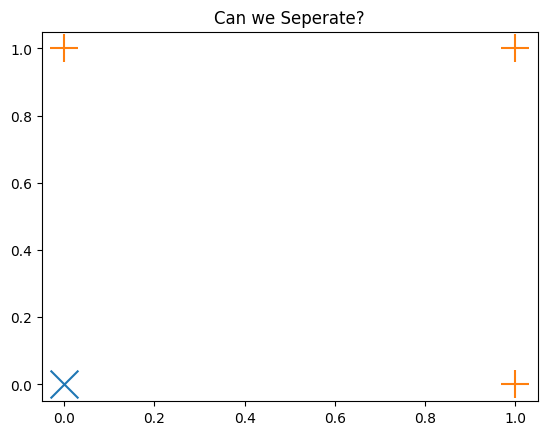

In [4]:
# plot our examples
plt.scatter(nos[:, 0], nos[:, 1], marker="x", s=400)
plt.scatter(yesses[:, 0], yesses[:, 1], marker="+", s=400)
plt.title("Can we Seperate?")

[Back to top](#-Index)

### Problem 1

#### Preparing the Data

**10 Points**

To prepare the data for modeling, you will need to add a bias term.  In this example, you are to prepend a column of -1's to the array `X` and save the new array as `Xt` below.

In [18]:
### GRADED
Xt = np.insert(X, 0, -np.ones(len(X)), axis=1)

### ANSWER CHECK
print(Xt)

[[-1  0  0]
 [-1  0  1]
 [-1  1  0]
 [-1  1  1]]


[Back to top](#-Index)

### Problem 2

#### Initializing the weights

**10 Points**

Below, an array of weights is given for both the bias term and the two features.  Use this weight array `w` to apply these weights to the input and bias.  Assign this product to `weighted_sum` below.

In [6]:
# weight array
w = np.array([-0.05, -0.02, 0.02])

In [7]:
### GRADED
weighted_sum = Xt @ w

### ANSWER CHECK
print(weighted_sum)

[-0.05 -0.03 -0.07 -0.05]


[Back to top](#-Index)

### Problem 3

#### Activation Function

**10 Points**

Now, use the basic threshold activation function to output 1 if the input is greater than 0, otherwise label it 0.  Assign the values as `predictions` below.  Apply this threshold function to the weighted sum.  What is the accuracy of the classifier after 1 epoch?  

In [8]:
### GRADED
predictions = np.where(weighted_sum > 0, 1, 0)

### ANSWER CHECK
print(predictions)

[0 0 0 0]


[Back to top](#-Index)

### Problem 4

#### Weight Update

**10 Points**

Next, you want to update the initial weights using the following rule for gradient descent with learning rate $\alpha$:

$$w_{i + 1} = w_{i} + \alpha(y - \hat{y})x$$

Use this rule to update the initial weights with $\alpha = 0.1$ and assign to `w2` below.

In [9]:
### GRADED
w2 = w + 0.1 * (y - predictions) @ Xt

### ANSWER CHECK
print(w2)

[0.25 0.18 0.22]


[Back to top](#-Index)

### Problem 5

#### Putting it together

**10 Points**

Now, consider building a model by performing 10 iterations of the weight updates.  What is the accuracy?  Assign this to `ans5` below.

In [10]:
### GRADED
w = np.array([-0.05, -0.02, 0.02])
for i in range(10):
    weighted_sum = Xt @ w
    predictions = np.where(weighted_sum > 0, 1, 0)
    acc = sum(predictions == y) / len(y)
    display([i, w, acc])
    w += 0.1 * (y - predictions) @ Xt
ans5 = acc

### ANSWER CHECK
print(ans5)
print(w)
print(predictions)

[0, array([-0.05, -0.02,  0.02]), np.float64(0.25)]

[1, array([0.25, 0.18, 0.22]), np.float64(0.75)]

[2, array([0.15, 0.18, 0.22]), np.float64(0.75)]

[3, array([0.05, 0.18, 0.22]), np.float64(0.75)]

[4, array([-0.05,  0.18,  0.22]), np.float64(1.0)]

[5, array([-0.05,  0.18,  0.22]), np.float64(1.0)]

[6, array([-0.05,  0.18,  0.22]), np.float64(1.0)]

[7, array([-0.05,  0.18,  0.22]), np.float64(1.0)]

[8, array([-0.05,  0.18,  0.22]), np.float64(1.0)]

[9, array([-0.05,  0.18,  0.22]), np.float64(1.0)]

1.0
[-0.05  0.18  0.22]
[0 1 1 1]


[Back to top](#-Index)

### Problem 6

#### A Larger Example

**10 Points**

Below, a second example is constructed using a synthetic dataset.  Your goal is to use the algorithm for updating the weights.  Determie the accuracy and assign as `ans6` below.

In [11]:
from sklearn.datasets import make_blobs

In [12]:
X, y = make_blobs(centers=2, center_box=(-3, 3), random_state=22)

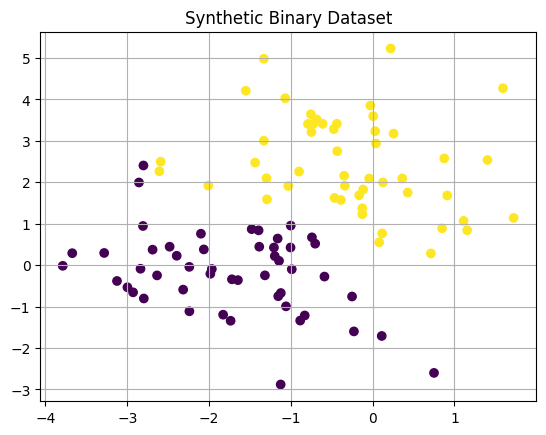

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()
plt.title("Synthetic Binary Dataset")

In [15]:
### GRADED
X2 = np.insert(X, 0, np.ones(len(X)), axis=1)
w = np.array([0.0, 0.0, 0.0])
for i in range(100):
    weighted_sum = X2 @ w
    predictions = np.where(weighted_sum > 0, 1, 0)
    acc = sum(predictions == y) / len(y)
    if i % 20 == 0:
        display([i, w, acc])
    w += 0.1 * (np.float64(y) - predictions) @ X2
ans6 = acc

### ANSWER CHECK
print(w)
print(ans6)

[0, array([0., 0., 0.]), np.float64(0.5)]

[20, array([-1.        ,  8.32207827,  9.36419365]), np.float64(0.99)]

[40, array([-1.4       ,  7.85617133,  9.69891443]), np.float64(1.0)]

[60, array([-1.4       ,  7.85617133,  9.69891443]), np.float64(1.0)]

[80, array([-1.4       ,  7.85617133,  9.69891443]), np.float64(1.0)]

[-1.4         7.85617133  9.69891443]
1.0
